In [13]:
#from Thesis.util.csv_visualisation import *
from Thesis.util.csv_visualisation import *

In [14]:
problem_names = ['JUSTICE']#,'DTLZ3']#, 'JUSTICE']
moeas = ['eps_nsgaii','generational_borg','borg']
core_count = [6]
seeds = 1
metric_names = ['hypervolume', 'generational_distance', 'epsilon_indicator', 
               'archive_size', 'spread', 'spacing', 'time_efficiency', 'epsilon_progress']

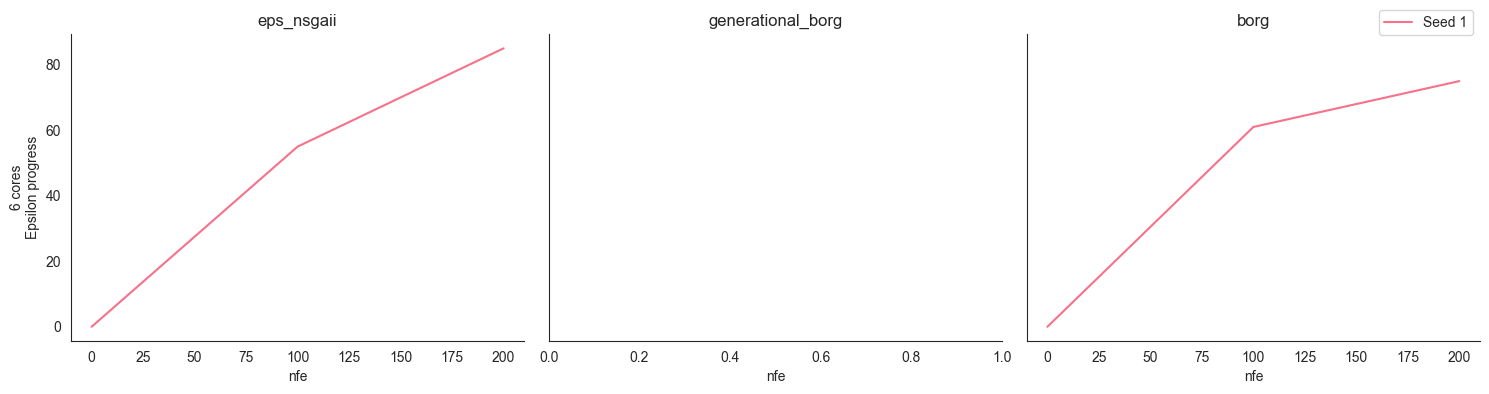

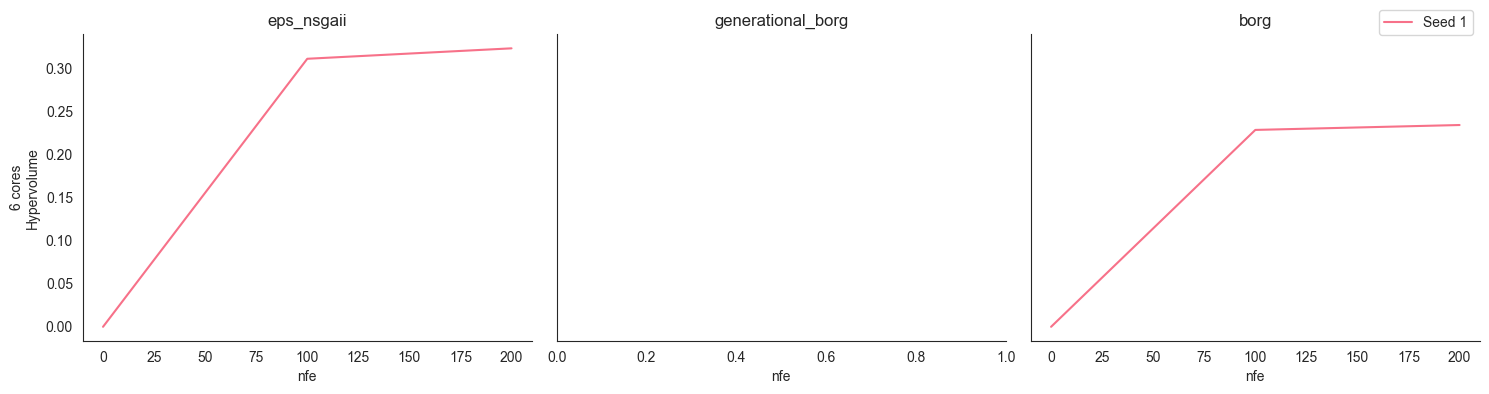

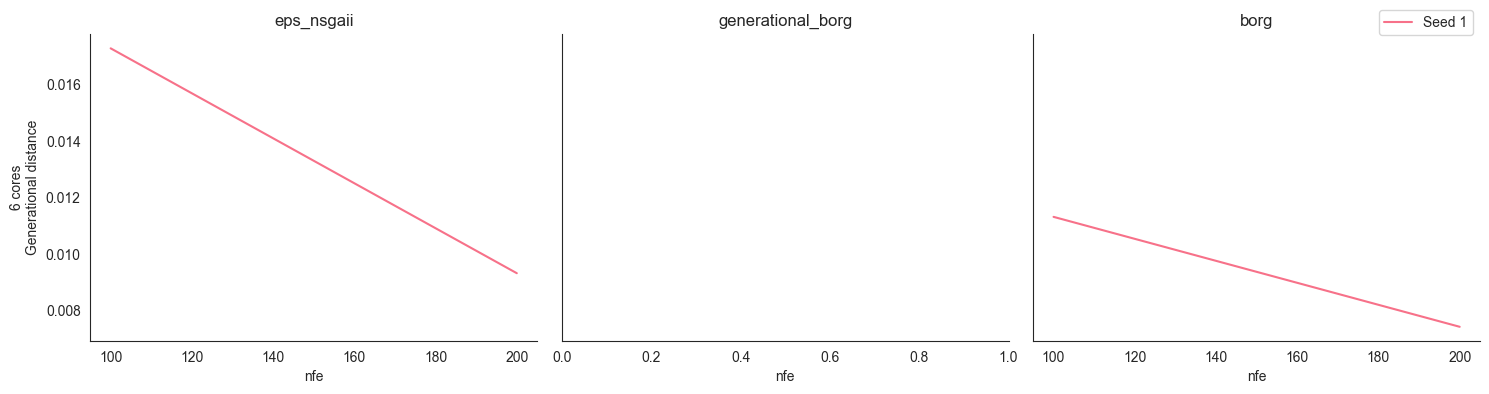

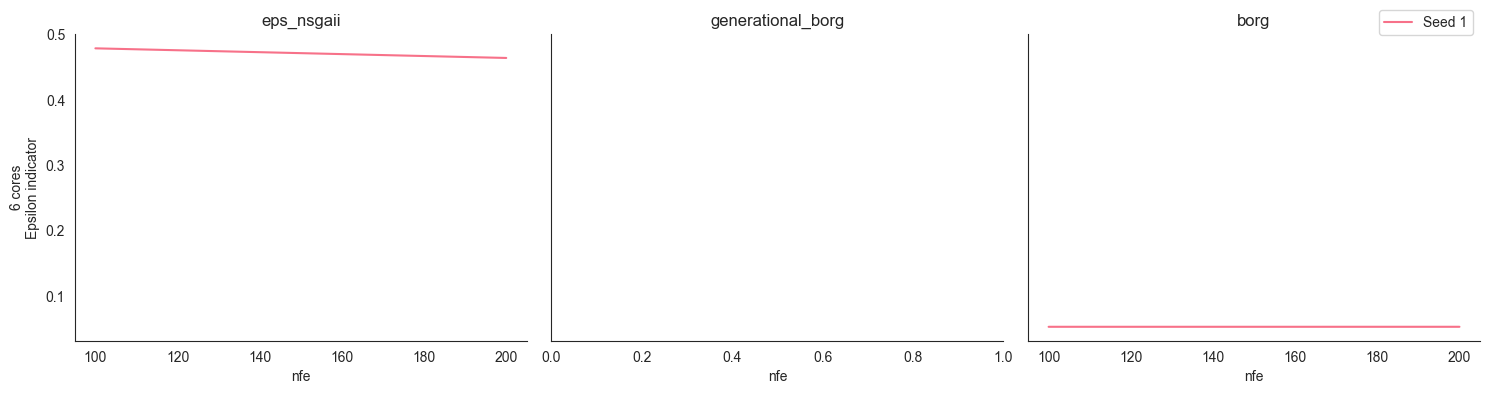

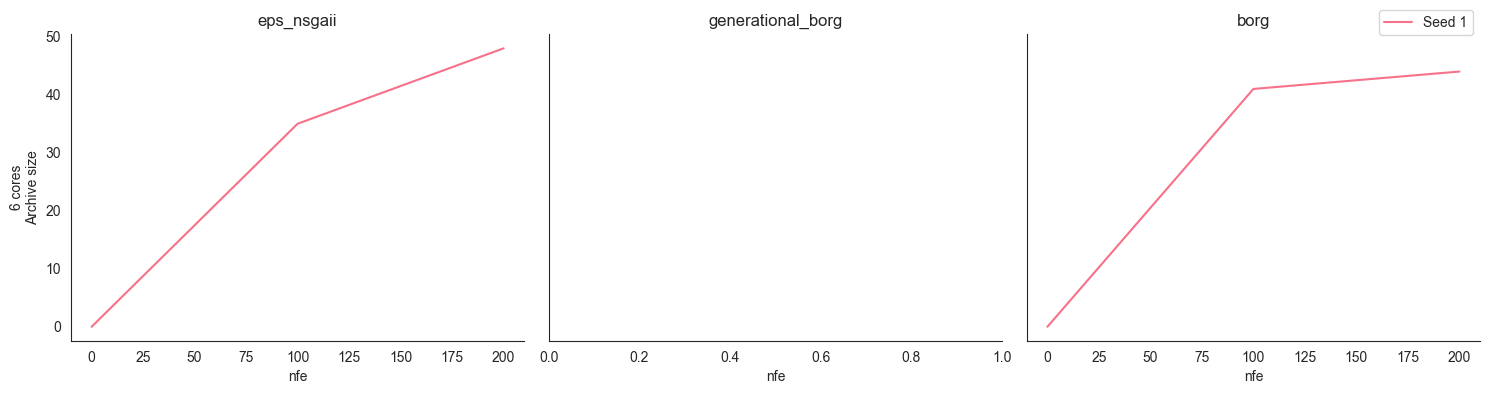

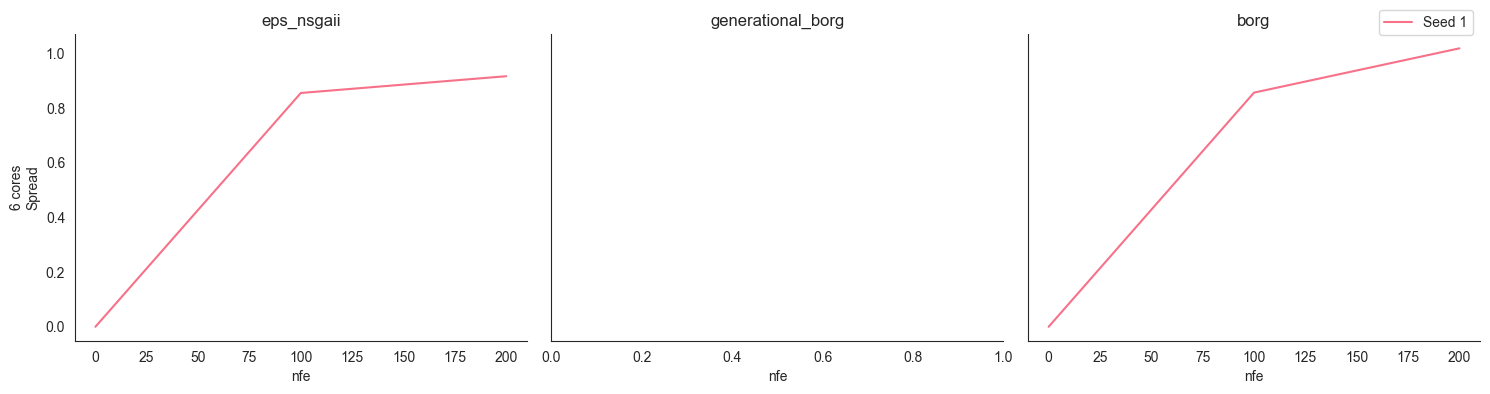

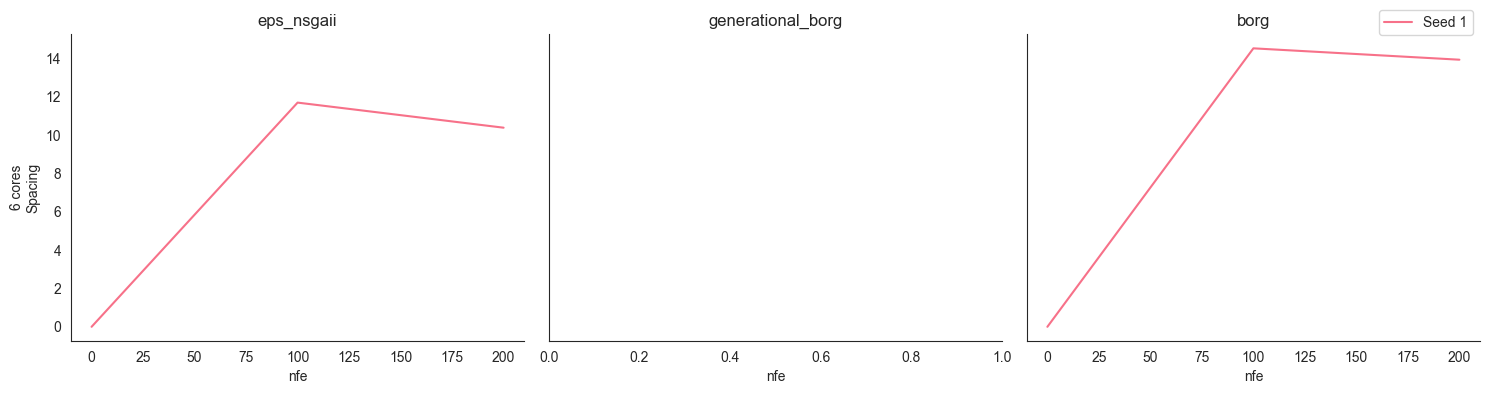

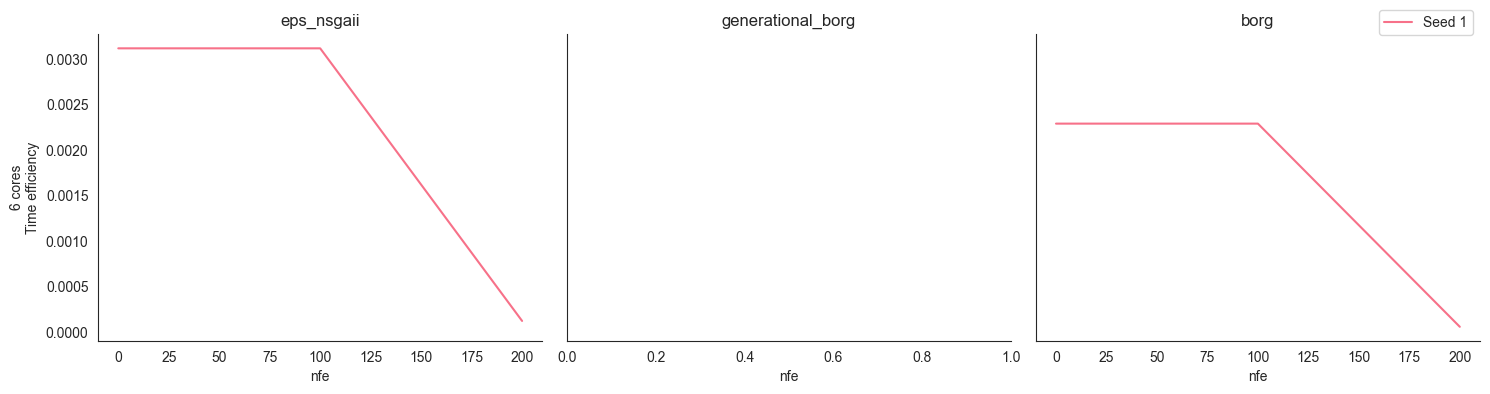

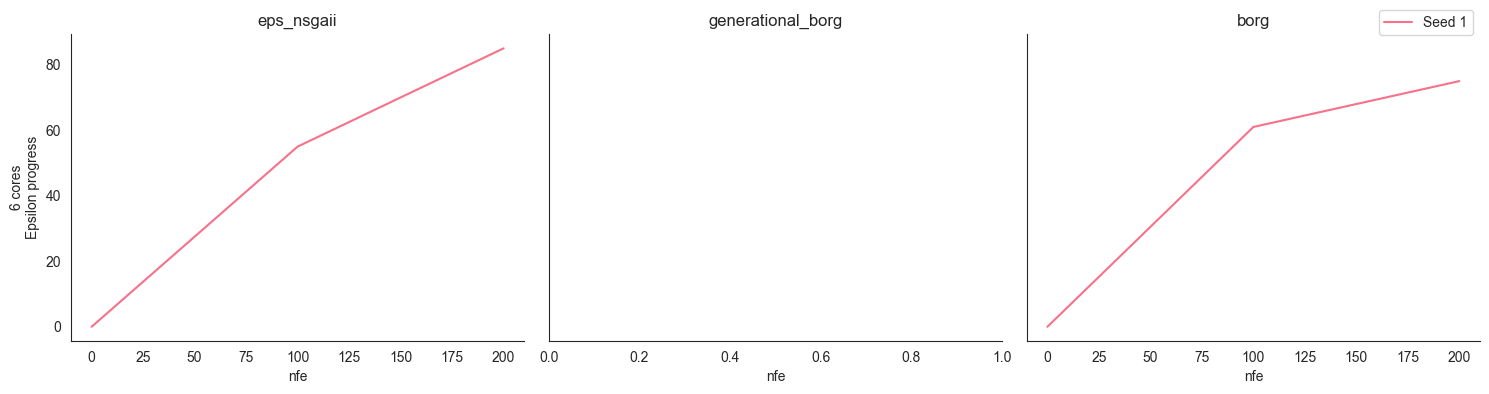

In [19]:
plot_metrics_by_cores(problem_names[0], moeas, core_count, seeds, metric_names)

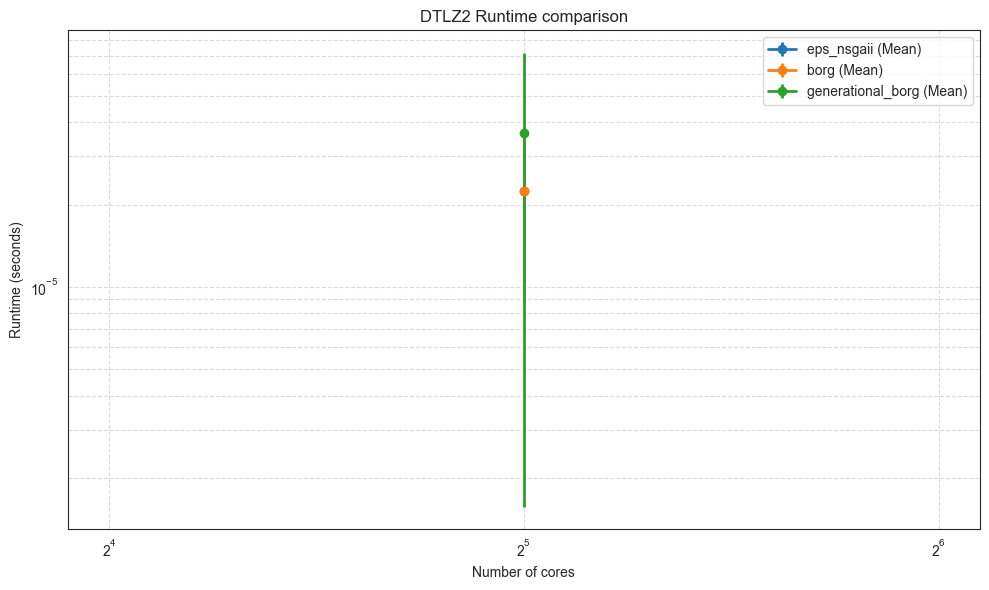

In [6]:
plot_runtime_comparison(problem_names[0], moeas, core_count)

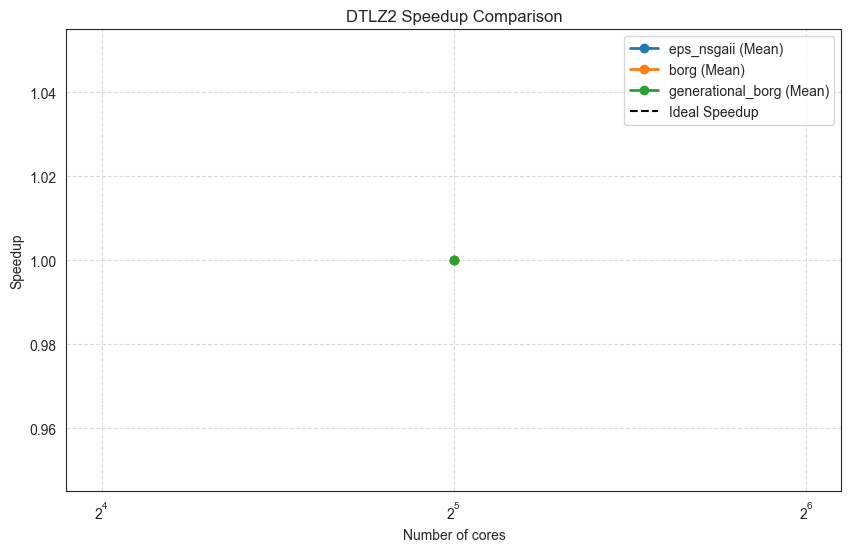

In [7]:
plot_speedup_comparison(problem_names[0], moeas, core_count)

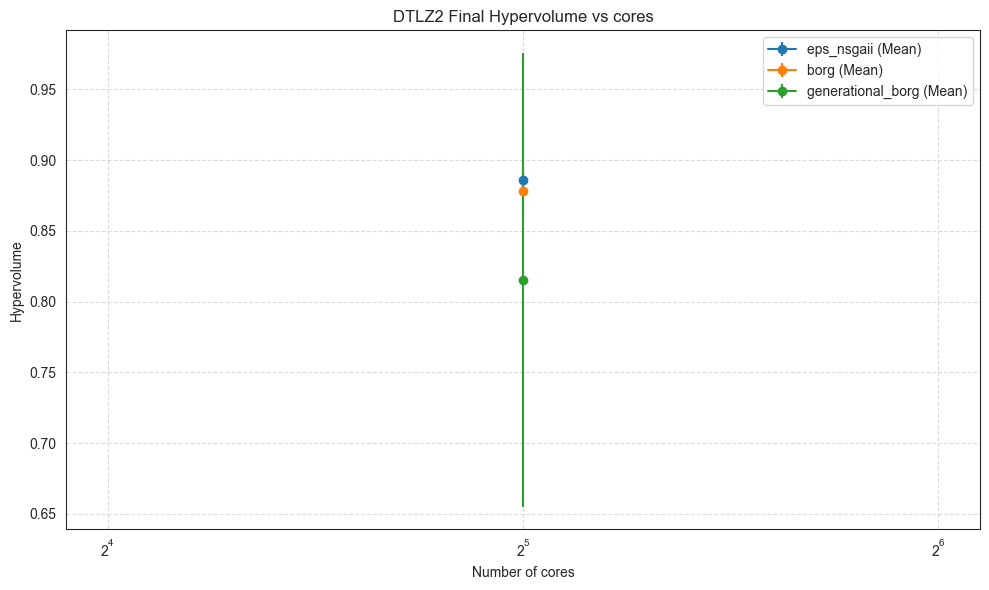

In [8]:
plot_final_metric_comparison(problem_names[0], moeas, core_count, 'hypervolume')

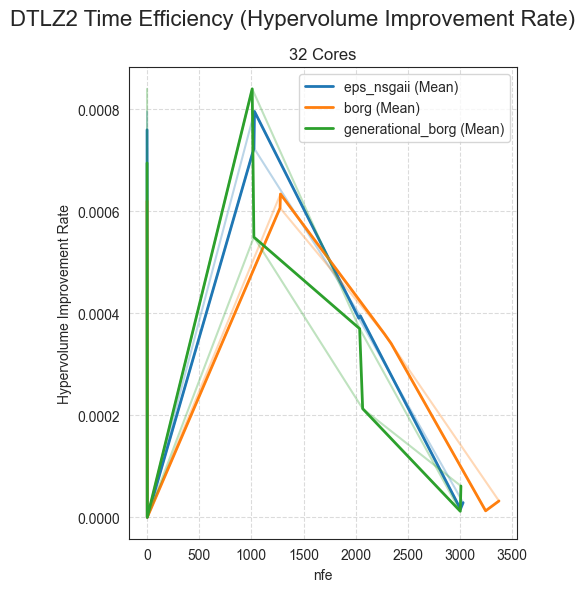

In [9]:
plot_hypervolume_efficiency(problem_names[0], moeas, core_count)

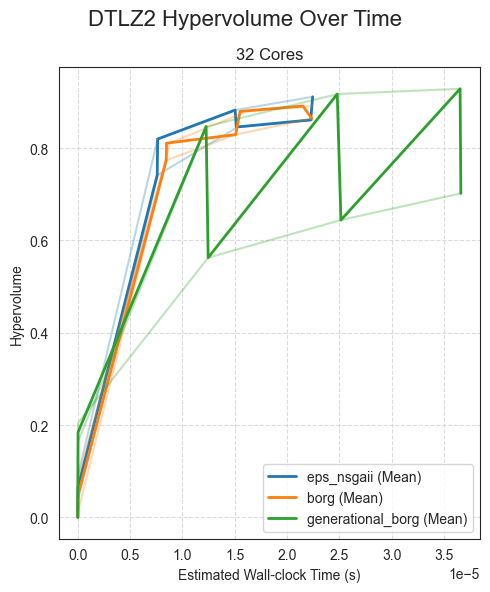

In [10]:
plot_hypervolume_over_time(problem_names[0], moeas, core_count)

population over nfe

justice objectives values (naar paloks visualistaion.ipynb)

palok weer inviten voor repo